<a href="https://colab.research.google.com/github/khalilullahalfaath/Project_Based_ML/blob/main/ML_Project_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama kelompok:
*   Naufal Abdurrahman Burhani
*   Hilman Taris Muttaqin
*   Muhammad Erlangga Arsadi
*   Khalilullah Al Faath





==========================================================

NIM terkecil: 1301204008

1301204008 % 4 = 0

Ketentuan tubes:

Tugas tipe 0: Bagging dengan regresi (dataset: autos MPG)


==========================================================



# Import libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# library untuk preprocessing
# Untuk data imputation
from sklearn.impute import SimpleImputer 
# untuk trasformasi
from sklearn import preprocessing
# untuk split dataset
from sklearn.model_selection import train_test_split
# untuk model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
# Untuk evaluasi
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Import dataset

In [2]:
df = pd.read_csv("https://github.com/khalilullahalfaath/Project_Based_ML/blob/fa1ad703e8ad687e46747bbfbd8e5cef6270aa11/autos_mpg.csv?raw=true")

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
df_terurut = df.sort_values(by=["model_year"])

df.equals(df_terurut)

False

Attribute information
1.	mpg: continuous (target attribute)
2.	cylinders: multi-valued discrete
3.	displacement: continuous
4.	horsepower: continuous
5.	weight: continuous
6.	acceleration: continuous
7.	model year: multi-valued discrete
8.	origin: multi-valued discrete
9.	car name: string (unique for each instance)


Proses Data Science:



*   Data Preparation
*   Data Cleansing
*   Exploratory Data Analysis
*   Feature Engineering
*   Modeling
*   Evaluation
*   Deployment












# Preprocessing

## Dimensi dataset

In [5]:
N, K = df.shape
print("Jumlah baris = ",N)
print("Jumlah kolom = ",K)

Jumlah baris =  398
Jumlah kolom =  9


## Lima data terawal

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Lima data terakhir

In [7]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


## Lima data random

In [8]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
140,14.0,8,304.0,150,4257,15.5,74,1,amc matador (sw)
232,16.0,8,351.0,149,4335,14.5,77,1,ford thunderbird
373,24.0,4,140.0,92,2865,16.4,82,1,ford fairmont futura
223,15.5,8,318.0,145,4140,13.7,77,1,dodge monaco brougham
332,29.8,4,89.0,62,1845,15.3,80,2,vokswagen rabbit


## Deskripsi terkait dataset

In [9]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Tipe setiap kolom dari dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Dapat dilihat bahwa dalam kolom 'horsepower' yang seharusnya numerik, malah bertipe object. Menandakan bahwa ada data yang null dengan '?'



## Memeriksa data null

In [11]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [12]:
df.columns[df.isin(['?']).any()]

Index(['horsepower'], dtype='object')

data NULL ada di kolom horsepower

In [13]:
df.replace("?",np.nan,inplace=True)

In [14]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


### Menentukan angka skewness dari data

Menurut sumber https://www.naukri.com/learning/articles/handling-missing-data-mean-median-mode/,
1.   Mean-It is preferred if data is numeric and not skewed.
2.   Median-It is preferred if data is numeric and skewed.
3.   Mode-It is preferred if the data is a string(object) or numeric.

In [15]:
temp_df = df['horsepower'].copy().dropna().astype(int).to_numpy()

In [16]:
temp_df

array([130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160, 150,
       225,  95,  95,  97,  85,  88,  46,  87,  90,  95, 113,  90, 215,
       200, 210, 193,  88,  90,  95, 100, 105, 100,  88, 100, 165, 175,
       153, 150, 180, 170, 175, 110,  72, 100,  88,  86,  90,  70,  76,
        65,  69,  60,  70,  95,  80,  54,  90,  86, 165, 175, 150, 153,
       150, 208, 155, 160, 190,  97, 150, 130, 140, 150, 112,  76,  87,
        69,  86,  92,  97,  80,  88, 175, 150, 145, 137, 150, 198, 150,
       158, 150, 215, 225, 175, 105, 100, 100,  88,  95,  46, 150, 167,
       170, 180, 100,  88,  72,  94,  90,  85, 107,  90, 145, 230,  49,
        75,  91, 112, 150, 110, 122, 180,  95, 100, 100,  67,  80,  65,
        75, 100, 110, 105, 140, 150, 150, 140, 150,  83,  67,  78,  52,
        61,  75,  75,  75,  97,  93,  67,  95, 105,  72,  72, 170, 145,
       150, 148, 110, 105, 110,  95, 110, 110, 129,  75,  83, 100,  78,
        96,  71,  97,  97,  70,  90,  95,  88,  98, 115,  53,  8

In [17]:
print(skew(temp_df))

1.0831611646869432


dapat dilihat bahwa colomn horsepower sangat condong ke arah kanan sehingga bagusnya menggunakan imputer dengan strategi median

## Handling data NULL

In [18]:
col_num = ['horsepower']

In [19]:
df = df.astype({'horsepower': 'float'})

In [20]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [22]:
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [23]:
df[col_num]

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [24]:
imputer = SimpleImputer(strategy = 'median', missing_values = np.nan)
imputer.fit(df[col_num])
df[col_num] = imputer.transform(df[col_num])

In [25]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


data NULL sudah berhasil dihilangkan

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


## Mengecek duplikasi data

In [27]:
bool_series = df.duplicated()
print(bool_series)

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool


In [28]:
print(type(bool_series))
bool_series.value_counts()

<class 'pandas.core.series.Series'>


False    398
dtype: int64

Tidak terdeteksi adanya duplikasi data

## Mengecek apakah data memiki variansi yang sedikit

In [29]:
df.var()

<ipython-input-29-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1460.969052
weight          717140.990526
acceleration         7.604848
model_year          13.672443
origin               0.643292
dtype: float64

kolom dengan variansi yang mendekati nilai 0 menandakan bahwa datanya tidak memiliki data yang tersebar atau cenderung memiliki value yang sama

In [30]:
col1len = []
for col in df:
    if (len(df[col].unique()) == 1):
      col1len.append(col)
print(col1len)

[]


In [31]:
df["origin"].unique()

array([1, 3, 2])

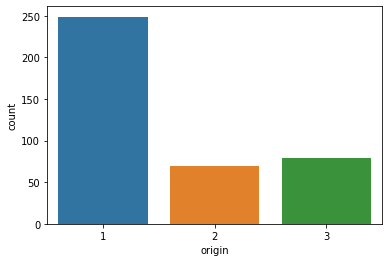

In [32]:
sns.countplot(x=df["origin"])
plt.show()

# EDA (Explanatory Data Analysis)

## Explorasi data kategorikal

Berdasarkan pengamatan, terlihat bahwa kolom yang sifatnya kategorikal adalah kolom origin, model_year, dan cylinder

In [33]:
col_categoric = ["origin","model_year","cylinders"]

In [34]:
df['origin'].unique()

array([1, 3, 2])

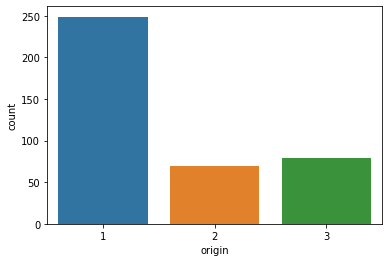

In [35]:
sns.countplot(x=df["origin"])

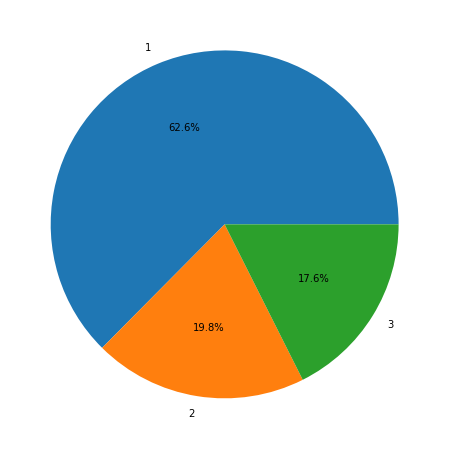

In [36]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.pie(df["origin"].value_counts(), labels = ["1","2","3"], autopct='%1.1f%%')
plt.show()

In [37]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

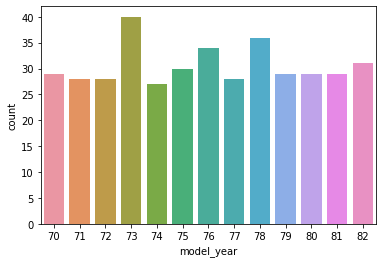

In [38]:
sns.countplot(x=df["model_year"])

In [39]:
labels = [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]

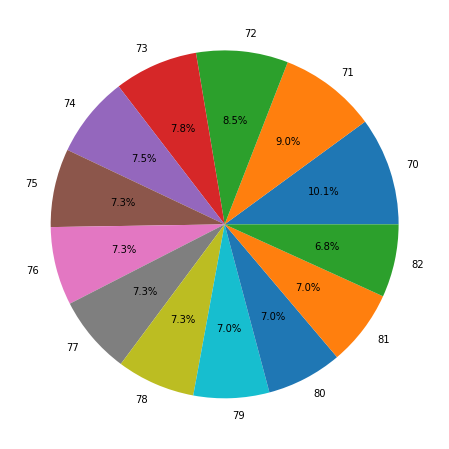

In [40]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.pie(df["model_year"].value_counts(), labels = labels, autopct='%1.1f%%')
plt.show()

In [41]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

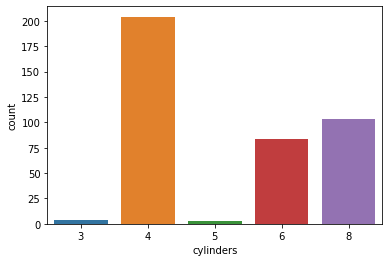

In [42]:
sns.countplot(x=df["cylinders"])
plt.show()

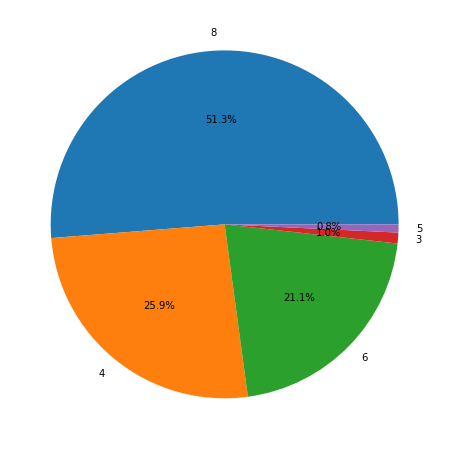

In [43]:
labels = [8, 4, 6, 3, 5]
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.pie(df["cylinders"].value_counts(), labels = labels, autopct='%1.1f%%')
plt.show()

## Explorasi data numerik

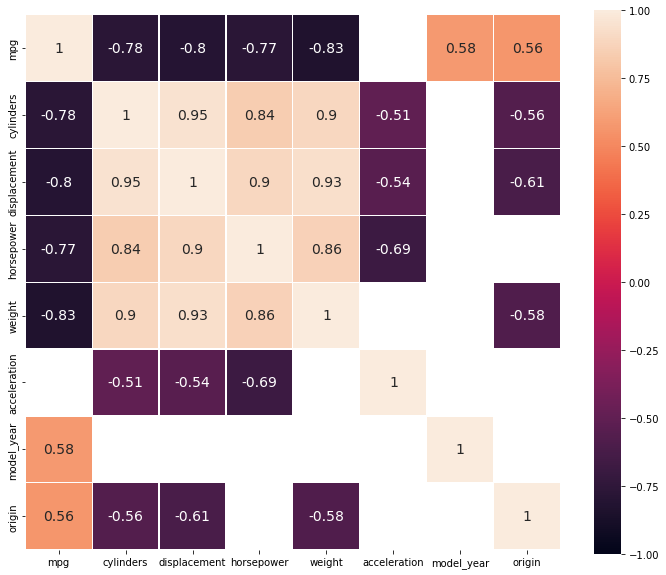

In [44]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr[(corr>=0.5) | (corr <= -0.5)],vmax=1.0, vmin=-1.0,linewidths=0.1,annot=True,
            annot_kws={"size":14},square=True)
plt.show()

In [45]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [46]:
col_numeric = ["mpg", "displacement", "horsepower", "weight", "acceleration"]

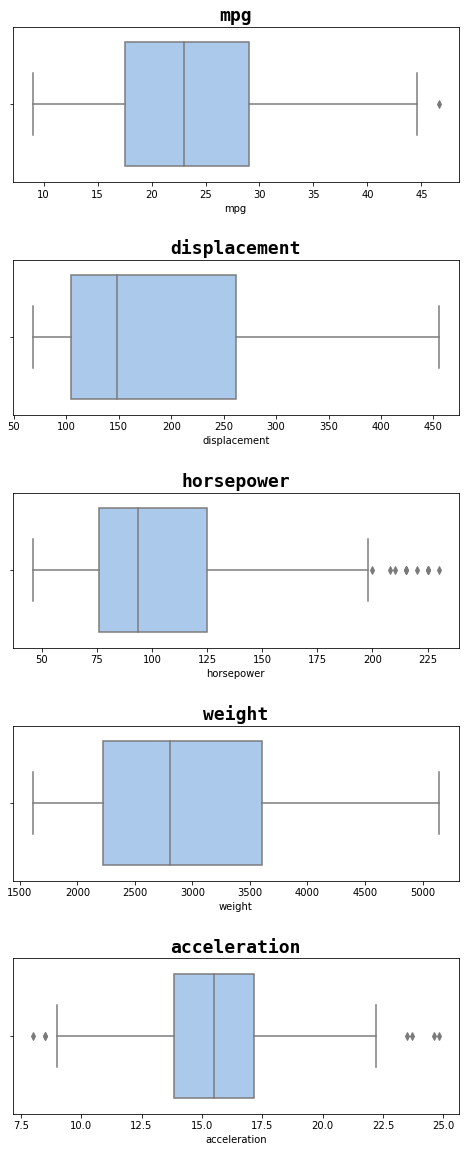

In [47]:
fig, ax = plt.subplots(5, 1, figsize = (8, 20))

for i, col in enumerate(col_numeric):
    plt.subplots_adjust(hspace=0.5)
    g = sns.boxplot(data = df, x = col, ax = ax[i], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")
plt.show()

dapat dilihat bahwa beberapa kolom yang memiliki outlier adalah kolom mpg, horsepower, dan acceleration. Karena outliers bukan merupakan noice dari data, maka outliers tersebut tidak perlu dihapus.

### Density plot

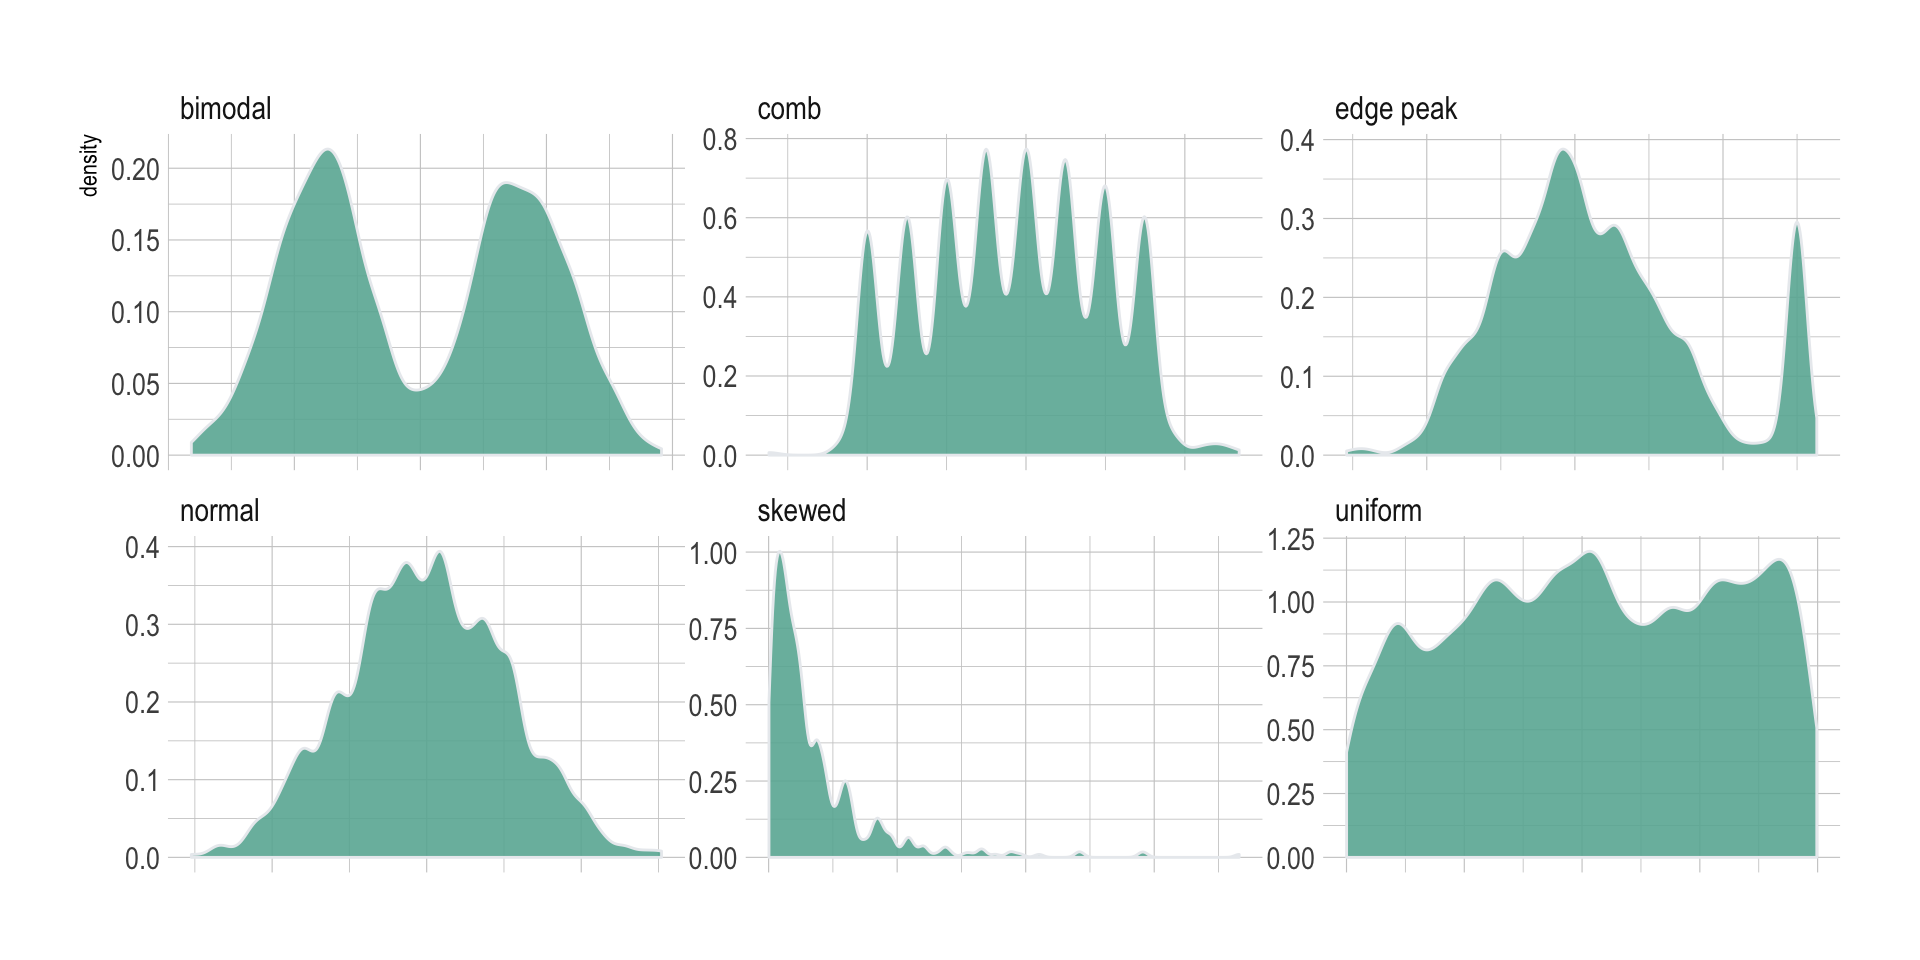

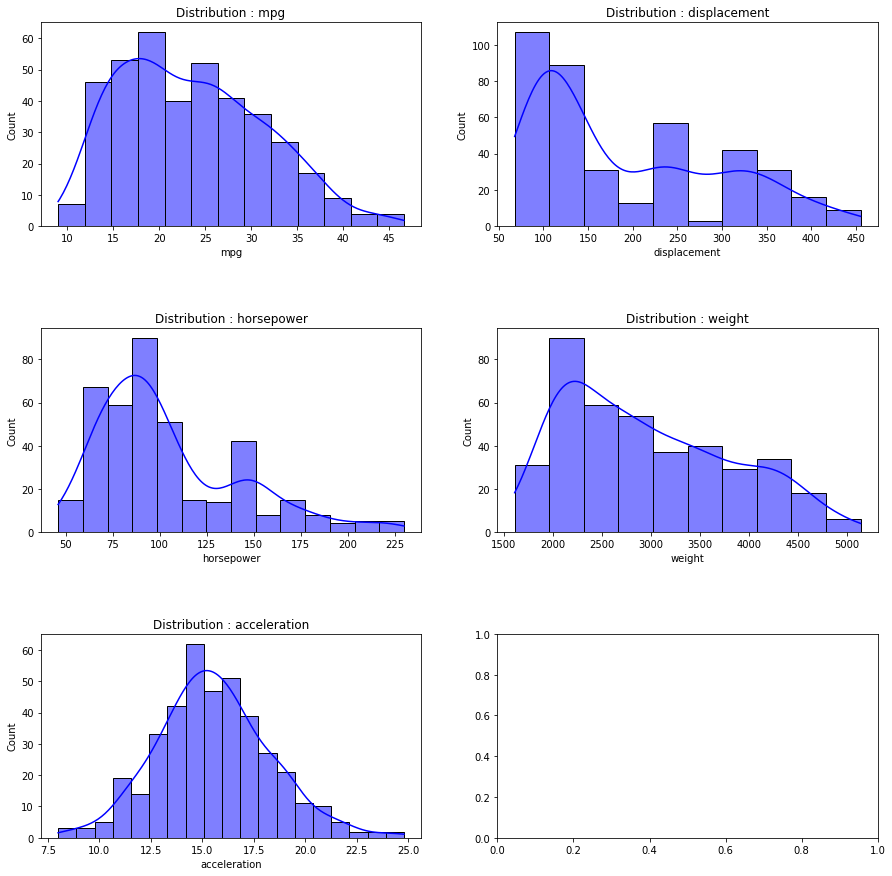

In [48]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))


for i in range(len(col_numeric)):
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(3,2,i+1)
    sns.histplot(df[col_numeric[i]],color = 'b',kde=True)
    title = 'Distribution : ' + col_numeric[i]
    plt.title(title)
plt.show()

* mpg, acceleration: normal
* displacement, horsepower, weight: right-skewed

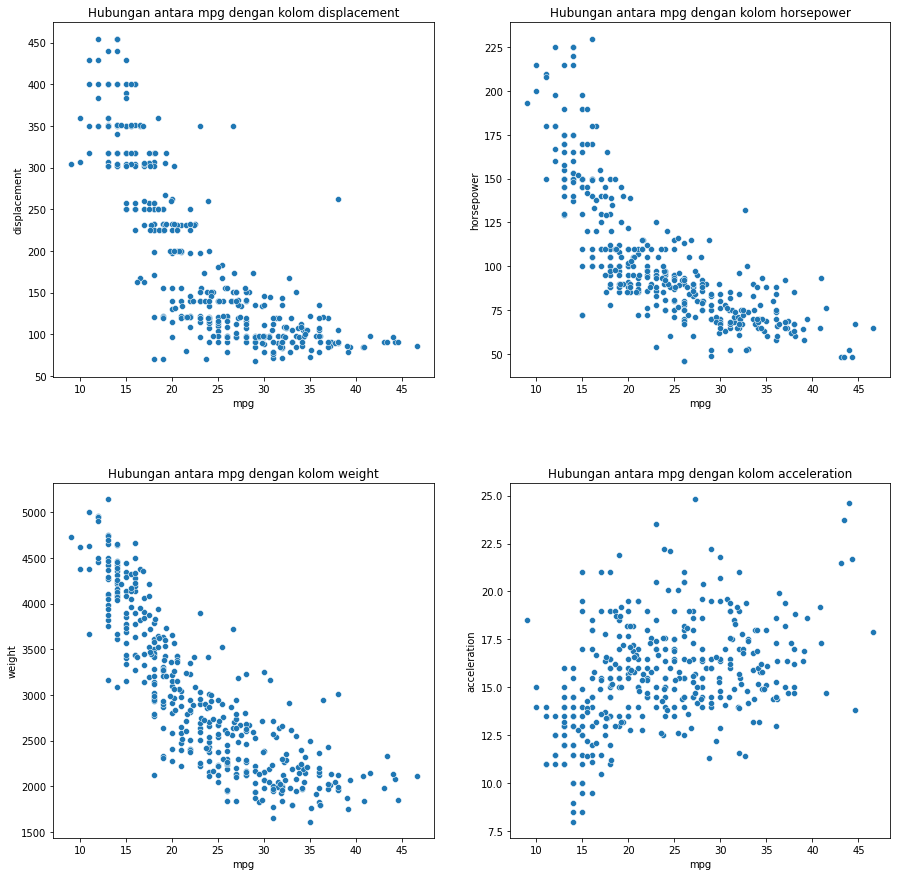

In [49]:
colm = ["displacement", "horsepower", "weight", "acceleration"]
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,15))

for i in range(len(colm)):
  plt.subplot(2,2,i+1)
  plt.subplots_adjust(hspace=0.3)
  sns.scatterplot(data = df,x="mpg",y=colm[i],palette = 'pastel',alpha=1)
  title = "Hubungan antara mpg dengan kolom " + colm[i]
  plt.title(title)
plt.show()

Terdapat korelasi yang negatif antara kolom mpg, dengan  semua kolom numerik kecuali acceleration

## Eksplorasi antara kategorikal dan numerik

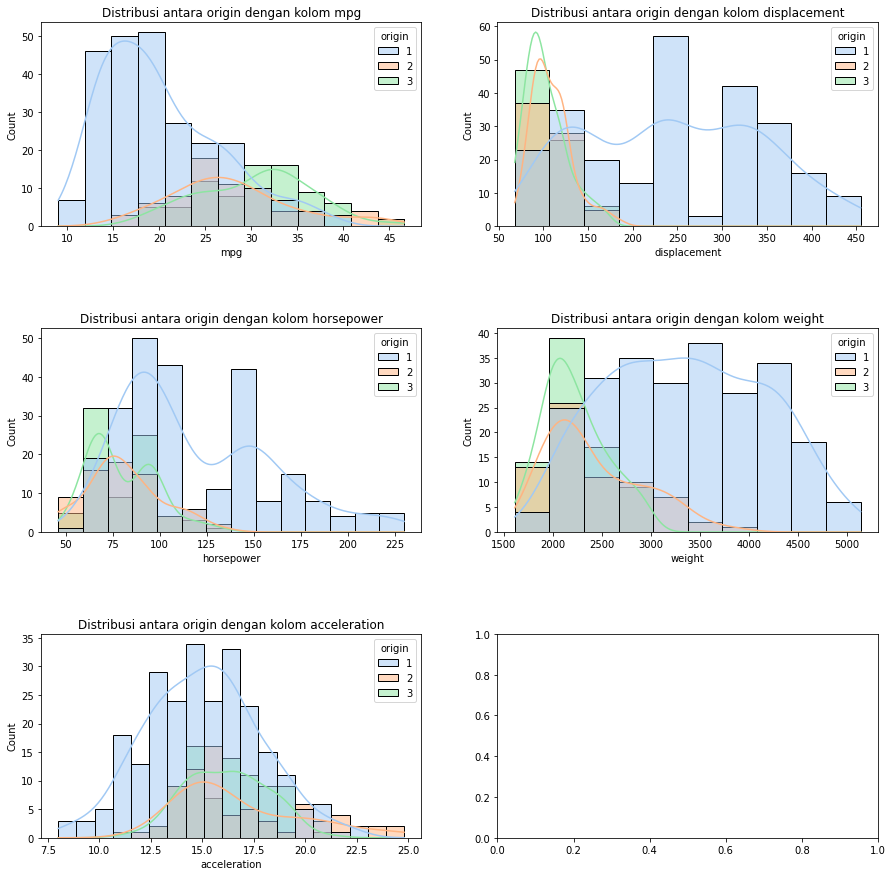

In [50]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))

for i in range(len(col_numeric)):
  plt.subplot(3,2,i+1)
  plt.subplots_adjust(hspace=0.5)
  sns.histplot(data = df,x=df[col_numeric[i]],palette = 'pastel',kde=True,hue="origin")
  title = "Distribusi antara origin dengan kolom " + col_numeric[i]
  plt.title(title)
plt.show()

* record origin 1 memiliki mpg yang kecil, displacement yang besar, horsepower dan weight daripada origin 2 dan 3
* origin 1 terdistribusi seragam pada weight dan displacement
* Distribusi untuk origin 2 dan 3 relatif sama
  * mpg, weight: normal
  * displacement: right-skewed
  * Pada horsepower, origin 2: bimodal, sementara origin 2 terdistribusi normal
* Semua origin berdistribusi normal pada kolom acceleration



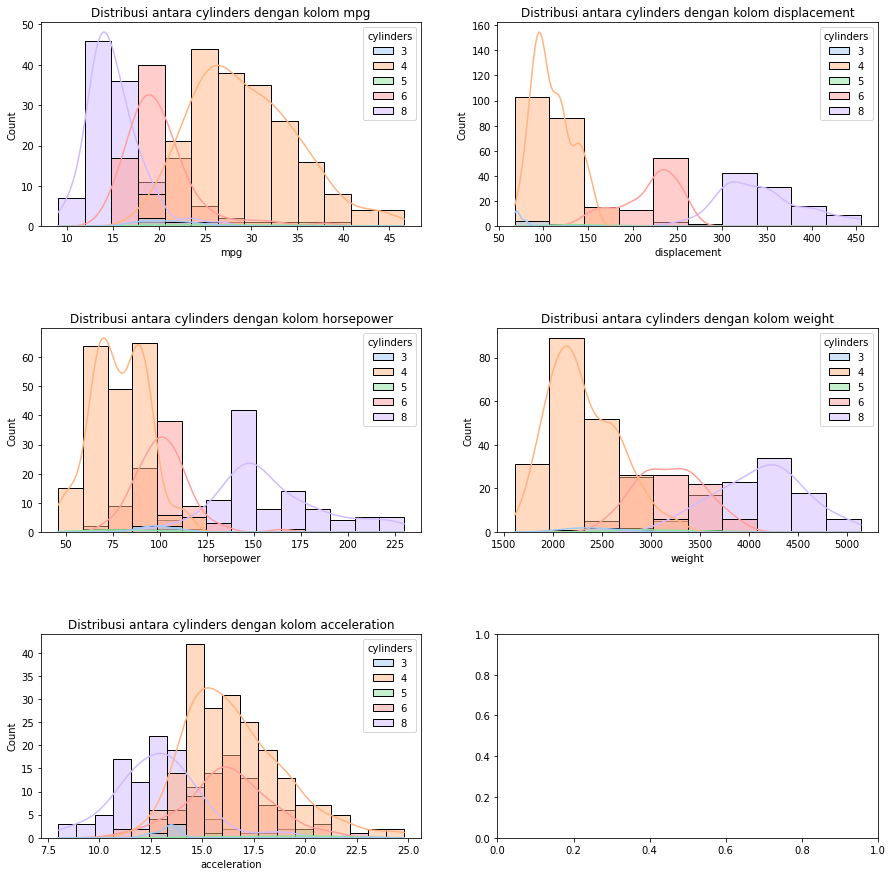

In [51]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))

for i in range(len(col_numeric)):
  plt.subplot(3,2,i+1)
  plt.subplots_adjust(hspace=0.5)
  sns.histplot(data = df,x=df[col_numeric[i]],palette = 'pastel',kde=True,hue="cylinders")
  title = "Distribusi antara cylinders dengan kolom " + col_numeric[i]
  plt.title(title)
plt.show()

* cylinders 4, 6, dan 8 terdistribusi normal di mpg, weight, acceleration

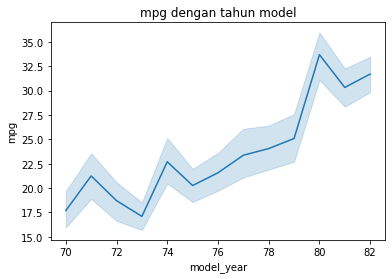

In [52]:
plt.title("mpg dengan tahun model")
sns.lineplot(data = df, x="model_year",y="mpg")
plt.show()

Semakin tinggi model_year maka mpg-nya juga semakin meningkat

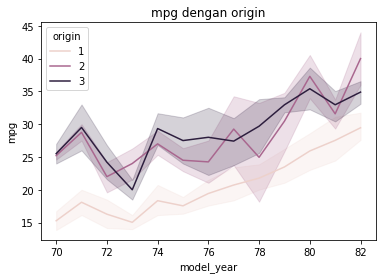

In [53]:
plt.title("mpg dengan origin")
sns.lineplot(data = df, x="model_year",y="mpg",hue="origin")
plt.show()

* mpg bertambah untuk setiap origin
* mpg origin 1 selalu di bawah origin 2 dan 3

## Menghitung outliers

In [54]:
df[col_numeric].describe()

,mpg,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.304020,2970.424623,15.568090
std,7.815984,104.269838,38.222625,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000
50%,23.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [55]:
Q1 = df[col_numeric].quantile(0.25)
Q3 = df[col_numeric].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filt = ((df[col_numeric] < (lower_bound)) | (df[col_numeric] > (upper_bound)))
filt.sum()

mpg              1
displacement     0
horsepower      11
weight           0
acceleration     7
dtype: int64

In [56]:
df.loc[filt["mpg"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


dapat dilihat bahwa value outliers di sini wajar sebab jika dilihat antara korelasi tiap variabel, mpg sangat berbanding terbalik dengan jumlah cylinders, displacement, horsepower, dan weightnya. sementara untuk record ke-322 ini, nilai dari kolom-kolom tersebut merupakan nilai yang sangat minimum.

In [57]:
df.loc[filt["acceleration"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
59,23.0,4,97.0,54.0,2254,23.5,72,2,volkswagen type 3
299,27.2,4,141.0,71.0,3190,24.8,79,2,peugeot 504
326,43.4,4,90.0,48.0,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup


pada kasus di atas, ini juga bukan merupakan noice outliers karena masih berkorelasi dengan kolom-kolom yang mempengaruhi nilai acceleration, yaitu cylinders, displacement, dan horsepower.

In [58]:
df.loc[filt["horsepower"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,1,chevy c20
27,11.0,8,318.0,210.0,4382,13.5,70,1,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,1,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,1,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom


pada kasus di atas, nilai dari horsepowernya juga sangat mungkin, karena cylindersnya bernilai sangat besar, yaitu 8.

In [59]:
# persentase outliers
filt = ((df[col_numeric] < (lower_bound)) | (df[col_numeric] > (upper_bound)))
filt = filt/len(df[col_numeric])*100
filt.sum()

mpg             0.251256
displacement    0.000000
horsepower      2.763819
weight          0.000000
acceleration    1.758794
dtype: float64

## Data transformation

Di sini transformasi data kita menggunakan scaling data

In [60]:
df.drop('car_name', axis=1, inplace=True)

In [61]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [62]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [63]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
minMax_df = pd.DataFrame(d, columns=names)
minMax_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0


# Model

In [64]:
df_model = minMax_df.copy()

In [65]:
y = df_model["mpg"]
df_model.drop(['mpg'], axis=1, inplace=True)

In [66]:
y

0      0.239362
1      0.159574
2      0.239362
3      0.186170
4      0.212766
         ...   
393    0.478723
394    0.930851
395    0.611702
396    0.505319
397    0.585106
Name: mpg, Length: 398, dtype: float64

In [67]:
df_model

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...
393,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
394,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
395,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
396,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.33, random_state=42)

In [69]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
324,0.2,0.043928,0.103261,0.140913,0.666667,0.833333,1.0
176,0.6,0.423773,0.239130,0.453076,0.535714,0.416667,0.0
119,0.2,0.118863,0.244565,0.274738,0.357143,0.250000,0.5
192,0.6,0.470284,0.320652,0.493337,0.386905,0.500000,0.0
202,0.6,0.490956,0.266304,0.447973,0.583333,0.500000,0.0
...,...,...,...,...,...,...,...
71,0.0,0.005168,0.277174,0.203289,0.327381,0.166667,1.0
106,1.0,0.728682,0.728261,0.818259,0.267857,0.250000,0.0
270,0.2,0.170543,0.266304,0.255741,0.404762,0.666667,1.0
348,0.2,0.054264,0.086957,0.123901,0.553571,0.916667,1.0


In [70]:
y_train

324    0.845745
176    0.265957
119    0.292553
192    0.345745
202    0.226064
         ...   
71     0.265957
106    0.079787
270    0.321809
348    0.763298
102    0.452128
Name: mpg, Length: 266, dtype: float64

In [71]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
198,0.2,0.059432,0.038043,0.051602,0.559524,0.500000,1.0
396,0.2,0.134367,0.179348,0.286929,0.630952,1.000000,0.0
33,0.6,0.423773,0.293478,0.289481,0.297619,0.083333,0.0
208,1.0,0.645995,0.565217,0.659768,0.309524,0.500000,0.0
93,1.0,0.645995,0.565217,0.743975,0.386905,0.250000,0.0
...,...,...,...,...,...,...,...
392,0.2,0.214470,0.239130,0.379076,0.553571,1.000000,0.0
379,0.2,0.077519,0.130435,0.145166,0.553571,1.000000,0.0
358,0.2,0.134367,0.152174,0.289765,0.613095,0.916667,1.0
310,0.2,0.054264,0.076087,0.100652,0.642857,0.833333,1.0


In [72]:
y_test

198    0.638298
396    0.505319
33     0.265957
208    0.106383
93     0.132979
         ...   
392    0.478723
379    0.718085
358    0.601064
310    0.773936
145    0.611702
Name: mpg, Length: 132, dtype: float64

In [73]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


## Decision tree Regressor

In [74]:
reggr_tree = BaggingRegressor(base_estimator = None, n_estimators=10, random_state=0).fit(X_train, y_train)

In [75]:
y_predict_tree = reggr_tree.predict(X_test)

In [76]:
print(y_predict_tree)

[0.58244681 0.55319149 0.36728723 0.14760638 0.13829787 0.48271277
 0.48670213 0.07978723 0.20984043 0.28590426 0.11968085 0.78297872
 0.5212766  0.125      0.42154255 0.09840426 0.57074468 0.30611702
 0.16888298 0.80159574 0.42952128 0.27393617 0.59654255 0.50797872
 0.18218085 0.78803191 0.43484043 0.40824468 0.3        0.09308511
 0.53085106 0.67898936 0.23723404 0.44148936 0.7912234  0.11170213
 0.35319149 0.25026596 0.13164894 0.43351064 0.42978723 0.51595745
 0.28723404 0.07180851 0.37952128 0.68404255 0.45345745 0.36702128
 0.41755319 0.48271277 0.43351064 0.79734043 0.63297872 0.07978723
 0.41223404 0.1037234  0.18191489 0.52074468 0.38962766 0.26329787
 0.1356383  0.57978723 0.41117021 0.31382979 0.26595745 0.41595745
 0.36489362 0.63031915 0.50797872 0.15026596 0.68909574 0.10638298
 0.1037234  0.2893617  0.53138298 0.29920213 0.26382979 0.53537234
 0.51595745 0.22579787 0.20744681 0.47606383 0.76489362 0.67446809
 0.39361702 0.10106383 0.6962766  0.69920213 0.45478723 0.0691

### Evaluation

In [77]:
reggr_tree.score(X_test,y_test)

0.8611845797143266

### Hyperparameters

Model DecisionTreeRegressor di scikit-learn memiliki beberapa hyperparameter yang dapat disesuaikan untuk meningkatkan performa. Berikut ini adalah daftar beberapa hyperparameter yang paling penting:
* Hyperparameter max_depth merupakan kontrol kompleksitas model dengan mengatur kedalaman maksimum dari tree. 
* Hyperparameter min_samples_split merupakan kontrol jumlah data yang dibutuhkan pada setiap node dengan mengatur jumlah sampel minimum yang diperlukan untuk membagi node internal.

* Hyperparameter min_samples_leaf merupakan kontrol jumlah data yang dibutuhkan pada setiap leaf node dengan mengatur jumlah sampel minimum yang diperlukan untuk berada pada leaf node. 

* Max_features adalah hyperparameter untuk mengontrol jumlah fitur atau kolom data yang dipertimbangkan pada setiap pemutusan node. Max_features mengontrol bagaimana model memecah data menjadi bagian-bagian kecil yang terpisah dengan mengatur jumlah fitur yang dipertimbangkan pada setiap pemutusan.

In [78]:
parameters = {
    "max_depth": [3, 5, 7, None],
    "min_samples_leaf": [1, 2, 4],
    "max_leaf_nodes": [5, 10, 20, None],
    "max_features": ["auto", "sqrt", "log2", None,1,2,3,4,5,6,7]
}

dtr = DecisionTreeRegressor()
clf_dtr = GridSearchCV(dtr, parameters, cv=5)
clf_dtr.fit(X_train,y_train)
print(clf_dtr.best_params_)
print(clf_dtr.score(X_train,y_train))

{'max_depth': 5, 'max_features': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 1}
0.9321499553571382


In [79]:
bg_regg_dtr = BaggingRegressor(base_estimator=clf_dtr,n_estimators=10,random_state=0).fit(X_train, y_train)

In [80]:
bg_regg_dtr.score(X_test,y_test)

0.868228515503453

## SVR Model

In [81]:
reggr_SVR = BaggingRegressor(base_estimator = SVR(),n_estimators=10, random_state=0).fit(X_train, y_train)

In [105]:
y_predict_SVR = reggr_SVR.predict(X_test)

In [106]:
print(y_predict_SVR)

[0.63182933 0.57797121 0.31734454 0.16571257 0.11176673 0.4360987
 0.51419548 0.16565505 0.20165504 0.26778896 0.18844708 0.75624259
 0.40193804 0.13466785 0.39979617 0.14185727 0.57952891 0.29989978
 0.21167569 0.77364224 0.37867595 0.29023494 0.47929499 0.55933621
 0.19538341 0.84542782 0.40179539 0.43639473 0.27130011 0.14015684
 0.53807908 0.74981477 0.28584071 0.37548085 0.72846229 0.17730062
 0.33743271 0.2533271  0.12958028 0.44453604 0.41399566 0.48946873
 0.28547383 0.12902048 0.32807236 0.69628687 0.42022171 0.33539502
 0.38841538 0.49834566 0.35560628 0.68318039 0.67778101 0.12109799
 0.46465636 0.13597464 0.26791137 0.55139469 0.39196222 0.2381362
 0.14915194 0.60216859 0.40117133 0.31639598 0.26504877 0.37621343
 0.4349834  0.67335989 0.52499246 0.13704285 0.64894781 0.11466572
 0.16867334 0.2705003  0.43821835 0.26782133 0.22842415 0.57044487
 0.50370143 0.25822747 0.18039679 0.42688963 0.77309338 0.68015325
 0.36242435 0.12758895 0.7203286  0.63376453 0.45147717 0.156392

### Evaluation

In [84]:
reggr_SVR.score(X_test,y_test)

0.9134325439215285

### Hyperparameters

In [85]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 1.0, 10],'gamma': ['scale','auto',1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf_svr = GridSearchCV(svr, parameters, cv=5)
clf_svr.fit(X_train,y_train)
print(clf_svr.best_params_)
print(clf_svr.score(X_train,y_train))


{'C': 1.0, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.8901769976787334


In [86]:
bg_regg_svr = BaggingRegressor(base_estimator=clf_svr,n_estimators=10,random_state=0).fit(X_train, y_train)

In [87]:
bg_regg_svr.score(X_test,y_test)

0.9121810927140912

## Gradient Boosting Regressor Model

In [88]:
reggr_Gradient = BaggingRegressor(base_estimator = GradientBoostingRegressor()).fit(X_train, y_train)

In [89]:
y_predict_Gradient = reggr_Gradient.predict(X_test)

In [107]:
y_predict_Gradient

array([0.55849307, 0.55699476, 0.30548346, 0.16802877, 0.11985102,
       0.48221358, 0.47485955, 0.07561546, 0.22558536, 0.27448218,
       0.10722988, 0.76644308, 0.51901739, 0.13045842, 0.41024519,
       0.09628835, 0.58570403, 0.31556435, 0.18059006, 0.75721074,
       0.40379801, 0.27655254, 0.46694862, 0.52142688, 0.17463703,
       0.69661449, 0.39769156, 0.38113453, 0.23631613, 0.0986899 ,
       0.48199434, 0.67135787, 0.21042108, 0.39853295, 0.81435816,
       0.10318493, 0.36588427, 0.24784337, 0.13081053, 0.43530589,
       0.48185284, 0.51102306, 0.29718964, 0.06780345, 0.38475289,
       0.68897306, 0.45133834, 0.3648812 , 0.41646771, 0.46773011,
       0.39011782, 0.74903426, 0.66433649, 0.08599663, 0.50429011,
       0.10647247, 0.2129748 , 0.54886921, 0.38781943, 0.25903174,
       0.14202906, 0.55272933, 0.38689673, 0.29981546, 0.26162423,
       0.43086525, 0.36958373, 0.66004211, 0.4820288 , 0.13007129,
       0.65395796, 0.12240587, 0.10679689, 0.23373167, 0.47901

### Evaluation

In [90]:
reggr_Gradient.score(X_test,y_test)

0.8856532881591567

### Hyperparameters


In [91]:
parameters = {
    "loss": ["squared_error", "absolute_error", "huber", "quantile"],
    "max_depth": [3, 5],
    "min_samples_leaf": [1, 2]
}
gbr = GradientBoostingRegressor()
clf_gbr = GridSearchCV(gbr, parameters, cv=5)
clf_gbr.fit(X_train,y_train)
print(clf_gbr.best_params_)
print(clf_gbr.score(X_train,y_train))

{'loss': 'huber', 'max_depth': 3, 'min_samples_leaf': 1}
0.9730819466749582


In [92]:
bg_regg_gbr = BaggingRegressor(base_estimator=clf_gbr,n_estimators=10,random_state=0).fit(X_train, y_train)

In [93]:
bg_regg_gbr.score(X_test,y_test)

0.8890287318202585

# Evaluation

In [113]:
def evaluation(model,y_test,y_predict):

  score = []
  score.append(r2_score(y_test,y_predict))
  score.append(mean_absolute_error(y_test,y_predict))
  score.append(mean_squared_error(y_test,y_predict))
  dict_score = {model: score}
  return dict_score


In [117]:
data_score = {}
data_score.update(evaluation("Decision Tree Regressor",y_test,y_predict_tree))
data_score.update(evaluation("SVR",y_test,y_predict_SVR))
data_score.update(evaluation("Gradient Boosting Regressor",y_test,y_predict_Gradient))

In [118]:
print(data_score)

{'Decision Tree Regressor': [0.8611845797143266, 0.05335872018052869, 0.00565145267037738], 'SVR': [0.9134325439215285, 0.04615213645562106, 0.003524333822680835], 'Gradient Boosting Regressor': [0.8856532881591567, 0.04927338545576954, 0.004655282739136014]}


In [120]:
pd.DataFrame.from_dict(data_score, orient='index',columns=['R2 Score', 'Mean Absolute Error', 'Mean Squared Error'])

,R2 Score,Mean Absolute Error,Mean Squared Error
Decision Tree Regressor,0.861185,0.053359,0.005651
SVR,0.913433,0.046152,0.003524
Gradient Boosting Regressor,0.885653,0.049273,0.004655


# Eksperiment

In [156]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [174]:
def test_regression():
    hasil_arr = []
    grid = ParameterGrid({"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "bootstrap_features": [True, False]})

    for base_estimator in [None,LinearRegression(),
                           DummyRegressor(),QuantileRegressor(),Ridge(),Lasso(),
                           DecisionTreeRegressor(),
                           KNeighborsRegressor(),
                           SVR()]:
        for params in grid:
            para = []
            para.append(str(base_estimator))
            para_val = list(params.values())
            for i in para_val:
              para.append(i)
            reggr = BaggingRegressor(base_estimator=base_estimator,
                             random_state=0,
                             **params).fit(X_train, y_train)
            y_predict= reggr.predict(X_test)
            para.append(reggr.score(X_test,y_test))
            para.append(mean_absolute_error(y_test,y_predict))
            para.append(mean_squared_error(y_test,y_predict))
            hasil_arr.append(para)
    return hasil_arr

In [175]:
hasil_arr = test_regression()

In [176]:
print(hasil_arr)

[['None', True, True, 0.5, 0.5, 0.8684259738023419, 0.058286752402443895, 0.0053566410718406355], ['None', True, True, 0.5, 1.0, 0.8684383067455249, 0.05564849674557121, 0.005356138973121764], ['None', True, True, 1.0, 0.5, 0.8775892692054654, 0.05399137653127015, 0.0049835850369356754], ['None', True, True, 1.0, 1.0, 0.8587539979514255, 0.05825878465506124, 0.005750406502496673], ['None', True, False, 0.5, 0.5, 0.8673175931939298, 0.05731530732860521, 0.005401765457419087], ['None', True, False, 0.5, 1.0, 0.8655687245142566, 0.05694259424690396, 0.005472965390031317], ['None', True, False, 1.0, 0.5, 0.8734728089546016, 0.05261121856866538, 0.005151174345309134], ['None', True, False, 1.0, 1.0, 0.8611845797143266, 0.05335872018052869, 0.00565145267037738], ['None', False, True, 0.5, 0.5, 0.891864535408417, 0.0533711449602407, 0.004402410473353383], ['None', False, True, 0.5, 1.0, 0.8701600357960915, 0.05399460025789813, 0.005286043948948897], ['None', False, True, 1.0, 0.5, 0.877931367

In [177]:
hasil = pd.DataFrame(hasil_arr, columns=["Base Estimator", "bootstrap","bootstrap_features","max_features","max_samples", "score","MAE","MSE"])

In [178]:
hasil

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
0,None,True,True,0.5,0.5,0.868426,0.058287,0.005357
1,None,True,True,0.5,1.0,0.868438,0.055648,0.005356
2,None,True,True,1.0,0.5,0.877589,0.053991,0.004984
3,None,True,True,1.0,1.0,0.858754,0.058259,0.005750
4,None,True,False,0.5,0.5,0.867318,0.057315,0.005402
...,...,...,...,...,...,...,...,...
139,SVR(),False,True,1.0,1.0,0.908015,0.047912,0.003745
140,SVR(),False,False,0.5,0.5,0.875096,0.055404,0.005085
141,SVR(),False,False,0.5,1.0,0.889283,0.052722,0.004508
142,SVR(),False,False,1.0,0.5,0.908508,0.047410,0.003725


## Akurasi terbaik dengan hyperparameter bagging regressornya berubah

In [179]:
hasil.sort_values(by=["score"],ascending=False)

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
135,SVR(),True,False,1.0,1.0,0.913433,0.046152,0.003524
143,SVR(),False,False,1.0,1.0,0.913136,0.046469,0.003536
142,SVR(),False,False,1.0,0.5,0.908508,0.047410,0.003725
139,SVR(),False,True,1.0,1.0,0.908015,0.047912,0.003745
138,SVR(),False,True,1.0,0.5,0.903865,0.049046,0.003914
...,...,...,...,...,...,...,...,...
57,QuantileRegressor(),False,True,0.5,1.0,-0.067044,0.170031,0.043441
63,QuantileRegressor(),False,False,1.0,1.0,-0.067044,0.170031,0.043441
59,QuantileRegressor(),False,True,1.0,1.0,-0.067044,0.170031,0.043441
58,QuantileRegressor(),False,True,1.0,0.5,-0.068416,0.170120,0.043497


In [193]:
hasil.sort_values(by=["MAE"])

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
135,SVR(),True,False,1.0,1.0,0.913433,0.046152,0.003524
143,SVR(),False,False,1.0,1.0,0.913136,0.046469,0.003536
142,SVR(),False,False,1.0,0.5,0.908508,0.047410,0.003725
139,SVR(),False,True,1.0,1.0,0.908015,0.047912,0.003745
110,DecisionTreeRegressor(),False,False,1.0,0.5,0.895829,0.048241,0.004241
...,...,...,...,...,...,...,...,...
57,QuantileRegressor(),False,True,0.5,1.0,-0.067044,0.170031,0.043441
63,QuantileRegressor(),False,False,1.0,1.0,-0.067044,0.170031,0.043441
59,QuantileRegressor(),False,True,1.0,1.0,-0.067044,0.170031,0.043441
58,QuantileRegressor(),False,True,1.0,0.5,-0.068416,0.170120,0.043497


In [181]:
hasil.sort_values(by=["MSE"])

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
135,SVR(),True,False,1.0,1.0,0.913433,0.046152,0.003524
143,SVR(),False,False,1.0,1.0,0.913136,0.046469,0.003536
142,SVR(),False,False,1.0,0.5,0.908508,0.047410,0.003725
139,SVR(),False,True,1.0,1.0,0.908015,0.047912,0.003745
138,SVR(),False,True,1.0,0.5,0.903865,0.049046,0.003914
...,...,...,...,...,...,...,...,...
57,QuantileRegressor(),False,True,0.5,1.0,-0.067044,0.170031,0.043441
63,QuantileRegressor(),False,False,1.0,1.0,-0.067044,0.170031,0.043441
59,QuantileRegressor(),False,True,1.0,1.0,-0.067044,0.170031,0.043441
58,QuantileRegressor(),False,True,1.0,0.5,-0.068416,0.170120,0.043497


## Akurasi Algoritma berbeda dengan hyperparameter untuk bagging regressornya default

In [186]:
df_awal = hasil.loc[(hasil["bootstrap"]==True)&(hasil["bootstrap_features"]==False)&(hasil["max_features"]==1.0)&(hasil["max_samples"]==1.0)]

In [187]:
df_awal

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
7,None,True,False,1.0,1.0,0.861185,0.053359,0.005651
23,LinearRegression(),True,False,1.0,1.0,0.841424,0.062926,0.006456
39,DummyRegressor(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
55,QuantileRegressor(),True,False,1.0,1.0,-0.028829,0.168396,0.041886
71,Ridge(),True,False,1.0,1.0,0.834370,0.064097,0.006743
87,Lasso(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
103,DecisionTreeRegressor(),True,False,1.0,1.0,0.861185,0.053359,0.005651
119,KNeighborsRegressor(),True,False,1.0,1.0,0.880996,0.053232,0.004845
135,SVR(),True,False,1.0,1.0,0.913433,0.046152,0.003524


In [188]:
df_awal.sort_values(by=["MSE"])

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
135,SVR(),True,False,1.0,1.0,0.913433,0.046152,0.003524
119,KNeighborsRegressor(),True,False,1.0,1.0,0.880996,0.053232,0.004845
7,None,True,False,1.0,1.0,0.861185,0.053359,0.005651
103,DecisionTreeRegressor(),True,False,1.0,1.0,0.861185,0.053359,0.005651
23,LinearRegression(),True,False,1.0,1.0,0.841424,0.062926,0.006456
71,Ridge(),True,False,1.0,1.0,0.834370,0.064097,0.006743
39,DummyRegressor(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
87,Lasso(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
55,QuantileRegressor(),True,False,1.0,1.0,-0.028829,0.168396,0.041886


In [189]:
df_awal.sort_values(by=["MAE"])

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
135,SVR(),True,False,1.0,1.0,0.913433,0.046152,0.003524
119,KNeighborsRegressor(),True,False,1.0,1.0,0.880996,0.053232,0.004845
7,None,True,False,1.0,1.0,0.861185,0.053359,0.005651
103,DecisionTreeRegressor(),True,False,1.0,1.0,0.861185,0.053359,0.005651
23,LinearRegression(),True,False,1.0,1.0,0.841424,0.062926,0.006456
71,Ridge(),True,False,1.0,1.0,0.834370,0.064097,0.006743
39,DummyRegressor(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
87,Lasso(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
55,QuantileRegressor(),True,False,1.0,1.0,-0.028829,0.168396,0.041886


In [191]:
df_awal.sort_values(by=["score"],ascending=False)

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
135,SVR(),True,False,1.0,1.0,0.913433,0.046152,0.003524
119,KNeighborsRegressor(),True,False,1.0,1.0,0.880996,0.053232,0.004845
7,None,True,False,1.0,1.0,0.861185,0.053359,0.005651
103,DecisionTreeRegressor(),True,False,1.0,1.0,0.861185,0.053359,0.005651
23,LinearRegression(),True,False,1.0,1.0,0.841424,0.062926,0.006456
71,Ridge(),True,False,1.0,1.0,0.834370,0.064097,0.006743
39,DummyRegressor(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
87,Lasso(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
55,QuantileRegressor(),True,False,1.0,1.0,-0.028829,0.168396,0.041886


In [194]:
hasil.loc[hasil['Base Estimator']=='QuantileRegressor()']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
48,QuantileRegressor(),True,True,0.5,0.5,-0.037258,0.168823,0.042229
49,QuantileRegressor(),True,True,0.5,1.0,-0.026450,0.168265,0.041789
50,QuantileRegressor(),True,True,1.0,0.5,-0.037258,0.168823,0.042229
51,QuantileRegressor(),True,True,1.0,1.0,-0.028335,0.168370,0.041866
52,QuantileRegressor(),True,False,0.5,0.5,-0.030016,0.168460,0.041934
53,QuantileRegressor(),True,False,0.5,1.0,-0.026036,0.168242,0.041772
54,QuantileRegressor(),True,False,1.0,0.5,-0.030936,0.168508,0.041971
55,QuantileRegressor(),True,False,1.0,1.0,-0.028829,0.168396,0.041886
56,QuantileRegressor(),False,True,0.5,0.5,-0.049880,0.169379,0.042743
57,QuantileRegressor(),False,True,0.5,1.0,-0.067044,0.170031,0.043441


## Hasil tiap Algoritma

In [ ]:
algoritma= [None,LinearRegression(),DummyRegressor(),
 QuantileRegressor(),Ridge(),Lasso(),
 DecisionTreeRegressor(),KNeighborsRegressor(),SVR()]

In [196]:
hasil.loc[hasil['Base Estimator']=='None']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
0,None,True,True,0.5,0.5,0.868426,0.058287,0.005357
1,None,True,True,0.5,1.0,0.868438,0.055648,0.005356
2,None,True,True,1.0,0.5,0.877589,0.053991,0.004984
3,None,True,True,1.0,1.0,0.858754,0.058259,0.005750
4,None,True,False,0.5,0.5,0.867318,0.057315,0.005402
5,None,True,False,0.5,1.0,0.865569,0.056943,0.005473
6,None,True,False,1.0,0.5,0.873473,0.052611,0.005151
7,None,True,False,1.0,1.0,0.861185,0.053359,0.005651
8,None,False,True,0.5,0.5,0.891865,0.053371,0.004402
9,None,False,True,0.5,1.0,0.870160,0.053995,0.005286


In [197]:
hasil.loc[hasil['Base Estimator']=='LinearRegression()']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
16,LinearRegression(),True,True,0.5,0.5,0.821880,0.069387,0.007252
17,LinearRegression(),True,True,0.5,1.0,0.820738,0.069046,0.007298
18,LinearRegression(),True,True,1.0,0.5,0.831835,0.066853,0.006846
19,LinearRegression(),True,True,1.0,1.0,0.830930,0.066730,0.006883
20,LinearRegression(),True,False,0.5,0.5,0.795384,0.072811,0.008330
21,LinearRegression(),True,False,0.5,1.0,0.795333,0.072423,0.008332
22,LinearRegression(),True,False,1.0,0.5,0.838945,0.063592,0.006557
23,LinearRegression(),True,False,1.0,1.0,0.841424,0.062926,0.006456
24,LinearRegression(),False,True,0.5,0.5,0.820340,0.069005,0.007314
25,LinearRegression(),False,True,0.5,1.0,0.820619,0.068349,0.007303


In [199]:
hasil.loc[hasil['Base Estimator']=='DummyRegressor()']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
32,DummyRegressor(),True,True,0.5,0.5,-0.001045,0.167420,0.040755
33,DummyRegressor(),True,True,0.5,1.0,-0.001470,0.167412,0.040772
34,DummyRegressor(),True,True,1.0,0.5,-0.001092,0.167418,0.040756
35,DummyRegressor(),True,True,1.0,1.0,-0.001432,0.167412,0.040770
36,DummyRegressor(),True,False,0.5,0.5,-0.000701,0.167438,0.040741
37,DummyRegressor(),True,False,0.5,1.0,-0.001213,0.167412,0.040761
38,DummyRegressor(),True,False,1.0,0.5,-0.001277,0.167412,0.040764
39,DummyRegressor(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
40,DummyRegressor(),False,True,0.5,0.5,-0.006808,0.167477,0.040989
41,DummyRegressor(),False,True,0.5,1.0,-0.007870,0.167496,0.041032


In [200]:
hasil.loc[hasil['Base Estimator']=='QuantileRegressor()']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
48,QuantileRegressor(),True,True,0.5,0.5,-0.037258,0.168823,0.042229
49,QuantileRegressor(),True,True,0.5,1.0,-0.026450,0.168265,0.041789
50,QuantileRegressor(),True,True,1.0,0.5,-0.037258,0.168823,0.042229
51,QuantileRegressor(),True,True,1.0,1.0,-0.028335,0.168370,0.041866
52,QuantileRegressor(),True,False,0.5,0.5,-0.030016,0.168460,0.041934
53,QuantileRegressor(),True,False,0.5,1.0,-0.026036,0.168242,0.041772
54,QuantileRegressor(),True,False,1.0,0.5,-0.030936,0.168508,0.041971
55,QuantileRegressor(),True,False,1.0,1.0,-0.028829,0.168396,0.041886
56,QuantileRegressor(),False,True,0.5,0.5,-0.049880,0.169379,0.042743
57,QuantileRegressor(),False,True,0.5,1.0,-0.067044,0.170031,0.043441


In [202]:
hasil.loc[hasil['Base Estimator']=='Ridge()']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
64,Ridge(),True,True,0.5,0.5,0.821168,0.067723,0.007281
65,Ridge(),True,True,0.5,1.0,0.819403,0.068233,0.007352
66,Ridge(),True,True,1.0,0.5,0.823888,0.067196,0.007170
67,Ridge(),True,True,1.0,1.0,0.825691,0.067053,0.007096
68,Ridge(),True,False,0.5,0.5,0.798651,0.070486,0.008197
69,Ridge(),True,False,0.5,1.0,0.798168,0.071114,0.008217
70,Ridge(),True,False,1.0,0.5,0.829419,0.065146,0.006945
71,Ridge(),True,False,1.0,1.0,0.834370,0.064097,0.006743
72,Ridge(),False,True,0.5,0.5,0.815717,0.067957,0.007503
73,Ridge(),False,True,0.5,1.0,0.818241,0.068085,0.007400


In [204]:
hasil.loc[hasil['Base Estimator']=='Lasso()']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
80,Lasso(),True,True,0.5,0.5,-0.001045,0.167420,0.040755
81,Lasso(),True,True,0.5,1.0,-0.001470,0.167412,0.040772
82,Lasso(),True,True,1.0,0.5,-0.001092,0.167418,0.040756
83,Lasso(),True,True,1.0,1.0,-0.001432,0.167412,0.040770
84,Lasso(),True,False,0.5,0.5,-0.000701,0.167438,0.040741
85,Lasso(),True,False,0.5,1.0,-0.001213,0.167412,0.040761
86,Lasso(),True,False,1.0,0.5,-0.001277,0.167412,0.040764
87,Lasso(),True,False,1.0,1.0,-0.001482,0.167412,0.040772
88,Lasso(),False,True,0.5,0.5,-0.006808,0.167477,0.040989
89,Lasso(),False,True,0.5,1.0,-0.007870,0.167496,0.041032


In [206]:
hasil.loc[hasil['Base Estimator']=='DecisionTreeRegressor()']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
96,DecisionTreeRegressor(),True,True,0.5,0.5,0.868426,0.058287,0.005357
97,DecisionTreeRegressor(),True,True,0.5,1.0,0.868438,0.055648,0.005356
98,DecisionTreeRegressor(),True,True,1.0,0.5,0.877589,0.053991,0.004984
99,DecisionTreeRegressor(),True,True,1.0,1.0,0.858754,0.058259,0.005750
100,DecisionTreeRegressor(),True,False,0.5,0.5,0.867318,0.057315,0.005402
101,DecisionTreeRegressor(),True,False,0.5,1.0,0.865569,0.056943,0.005473
102,DecisionTreeRegressor(),True,False,1.0,0.5,0.873473,0.052611,0.005151
103,DecisionTreeRegressor(),True,False,1.0,1.0,0.861185,0.053359,0.005651
104,DecisionTreeRegressor(),False,True,0.5,0.5,0.891865,0.053371,0.004402
105,DecisionTreeRegressor(),False,True,0.5,1.0,0.870160,0.053995,0.005286


In [207]:
hasil.loc[hasil['Base Estimator']=='KNeighborsRegressor()']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
112,KNeighborsRegressor(),True,True,0.5,0.5,0.872066,0.054288,0.005208
113,KNeighborsRegressor(),True,True,0.5,1.0,0.877143,0.055003,0.005002
114,KNeighborsRegressor(),True,True,1.0,0.5,0.876521,0.052544,0.005027
115,KNeighborsRegressor(),True,True,1.0,1.0,0.891344,0.049761,0.004424
116,KNeighborsRegressor(),True,False,0.5,0.5,0.854267,0.057649,0.005933
117,KNeighborsRegressor(),True,False,0.5,1.0,0.860601,0.058202,0.005675
118,KNeighborsRegressor(),True,False,1.0,0.5,0.859390,0.055727,0.005725
119,KNeighborsRegressor(),True,False,1.0,1.0,0.880996,0.053232,0.004845
120,KNeighborsRegressor(),False,True,0.5,0.5,0.872645,0.055590,0.005185
121,KNeighborsRegressor(),False,True,0.5,1.0,0.884731,0.053110,0.004693


In [208]:
hasil.loc[hasil['Base Estimator']=='SVR()']

,Base Estimator,bootstrap,bootstrap_features,max_features,max_samples,score,MAE,MSE
128,SVR(),True,True,0.5,0.5,0.887351,0.051872,0.004586
129,SVR(),True,True,0.5,1.0,0.886214,0.051832,0.004632
130,SVR(),True,True,1.0,0.5,0.897456,0.049416,0.004175
131,SVR(),True,True,1.0,1.0,0.898752,0.049350,0.004122
132,SVR(),True,False,0.5,0.5,0.876051,0.055702,0.005046
133,SVR(),True,False,0.5,1.0,0.880291,0.055225,0.004874
134,SVR(),True,False,1.0,0.5,0.900904,0.049334,0.004034
135,SVR(),True,False,1.0,1.0,0.913433,0.046152,0.003524
136,SVR(),False,True,0.5,0.5,0.887689,0.052866,0.004572
137,SVR(),False,True,0.5,1.0,0.885454,0.052547,0.004663
